<a href="https://colab.research.google.com/github/hafizhfadhullah/Python/blob/main/MYP/CDD_ML_Part_4_MYP_Regression_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bioinformatics Project - Computational Drug Discovery [Part 4] Regression Models with Random Forest**

---

## **1. Import libraries**

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

## **2. Load the data set**

In [1]:
! wget https://github.com/hafizhfadhullah/Data/raw/main/MYP_06_bioactivity_data_3class_pIC50_pubchem_fp.csv

--2025-01-29 08:46:12--  https://github.com/hafizhfadhullah/Data/raw/main/MYP_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/hafizhfadhullah/Data/main/MYP_06_bioactivity_data_3class_pIC50_pubchem_fp.csv [following]
--2025-01-29 08:46:12--  https://raw.githubusercontent.com/hafizhfadhullah/Data/main/MYP_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1607935 (1.5M) [text/plain]
Saving to: ‘MYP_06_bioactivity_data_3class_pIC50_pubchem_fp.csv’

MYP_06_bioactivity_ 100%[===================>]   1.53M  --.

In [4]:
df = pd.read_csv('MYP_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

## **3. Input features**
The ***Acetylcholinesterase*** data set contains 881 input features and 1 output variable (pIC50 values).

### **3.1. Input features**

In [5]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
895,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
896,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
897,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### **3.2. Output features**

In [6]:
Y = df.pIC50
Y

,pIC50
0,4.481486
1,3.835647
2,4.221849
3,4.221849
4,4.537602
...,...
894,7.376751
895,8.161151
896,8.886057
897,8.619789


### **3.3. Let's examine the data dimension**

In [7]:
X.shape

(899, 881)

In [8]:
Y.shape

(899,)

### **3.4. Remove low variance features**

In [9]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)

In [10]:
X.shape

(899, 111)

## **4. Data split (80/20 ratio)**

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [12]:
X_train.shape, Y_train.shape

((719, 111), (719,))

In [13]:
X_test.shape, Y_test.shape

((180, 111), (180,))

## **5. Building a Regression Model using Random Forest**

In [14]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.5887983401535917

In [15]:
Y_pred = model.predict(X_test)

## **6. Scatter Plot of Experimental vs Predicted pIC50 Values**

<function matplotlib.pyplot.show(close=None, block=None)>

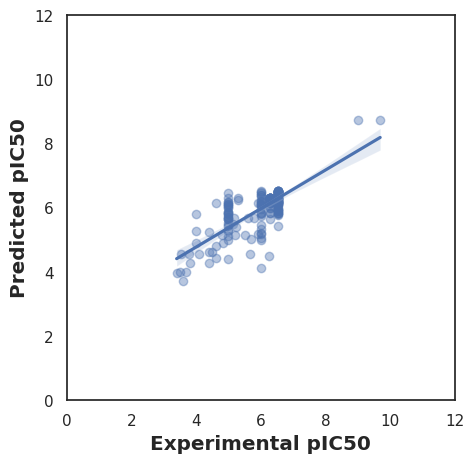

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha': 0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show